In [10]:
import os
from bson.json_util import dumps
from path import *
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Utils

In [11]:
def convert_from_list_to_dict(list):
    dict = {}
    for el in list:
        dict[el[0]] = int(el[1])
    return dict 

### Generatore di WordCloud

In [12]:
def generate_wordcloud(counter):
	pink_mask = np.array(Image.open(MASK_PATH))
	wc = WordCloud(width = 800, height = 800, background_color='white', mask=pink_mask).generate_from_frequencies(counter)
	image_colors = ImageColorGenerator(pink_mask)
	wc.recolor(color_func = image_colors) 
	plt.figure(figsize = (8, 8), facecolor = "black")
	plt.imshow(wc)
	plt.axis("off")
	plt.show()

#### Generatore di EmojiCloud

In [13]:
def generate_emojicloud(counter):
	pink_mask = np.array(Image.open(MASK_PATH))
	wc = WordCloud(width = 800, height = 800, background_color='white', font_path = "Symbola.otf", mask=pink_mask).generate_from_frequencies(counter )
	image_colors = ImageColorGenerator(pink_mask)
	wc.recolor(color_func = image_colors) 
	plt.figure(figsize = (8, 8), facecolor = "black")
	plt.imshow(wc)
	plt.axis("off")
	plt.show()

### MongoDB
Goal 1: per creare le word clouds per ciascun sentimento, per ciascun sentiment file,
usare la aggregation pipeline e calcolare la frequenza totale nei messaggi Twitter di ciascun token: word, hashtag, emoji, emoticon

Goal 2: calcolare le statistiche (percentuali) delle parole delle risorse lessicali presenti anche nei messaggi di Twitter

### Relazionale
1. list the lexical resources containing each word, so that
we can rely upon a unique resource source obtained by
the fusion of the single resources.
2. count the number of occurrences of each word in the
Twitter messages for each emotion so that at the end we
can draw a word cloud associated to the most frequent
words in each emotion.

In [14]:
import mysql.connector

### Connection

In [15]:
PW = 'MongoMongoMongo97'

def create_db_connection(host_name, user_name, user_password, db_name):
	connection = mysql.connector.connect(
		host=host_name,
		user=user_name,
		passwd=user_password,
		database=db_name
	)
	return connection

CONNECTION = create_db_connection("localhost", "root", PW, 'maadb_project')

### Query

In [16]:
def get_data_from_db(query):
    cursor = CONNECTION.cursor()
    cursor.execute(query)
    return cursor

def get_sentiment():
    return get_data_from_db("SELECT * FROM sentiment;")
  
def get_words_and_frequency(sentiment, num_words):
    return get_data_from_db(f"""SELECT lemma, sum(frequence) AS occurrences
                                        FROM (
                                            SELECT *
                                            FROM wordsintweet
                                            WHERE wordsintweet.id_tweet IN (
                                                SELECT id_tweet
                                                FROM tweet
                                                WHERE sentiment = '{sentiment}'
                                            )
                                        ) AS boh JOIN word ON word.id_word = boh.id_word
                                        GROUP BY lemma
                                        ORDER BY occurrences DESC
                                        limit {num_words}""")

def get_tokens_and_frequency(sentiment, num_tokens):
    return get_data_from_db(f"""SELECT token, sum(frequence) AS occurrences
                                        FROM (
                                            SELECT *
                                            FROM tokensintweet
                                            WHERE tokensintweet.id_tweet IN (
                                                SELECT id_tweet
                                                FROM tweet
                                                WHERE sentiment = '{sentiment}'
                                            )
                                        ) AS boh JOIN token ON token.id_token = boh.id_token
                                        GROUP BY token
                                        ORDER BY occurrences DESC
                                        limit {num_tokens}""")

In [17]:
anger_data = get_words_and_frequency("anger", 50).fetchall()
anticipation_data = get_words_and_frequency("anticipation", 50).fetchall()
disgust_data = get_words_and_frequency("disgust", 50).fetchall()
fear_data = get_words_and_frequency("fear", 50).fetchall()
joy_data = get_words_and_frequency("joy", 50).fetchall()
sadness_data = get_words_and_frequency("sadness", 50).fetchall()
surprise_data = get_words_and_frequency("surprise", 50).fetchall()
trust_data = get_words_and_frequency("trust", 50).fetchall()

In [18]:
anger_tokens = get_tokens_and_frequency("anger", 50).fetchall()
anticipation_tokens = get_tokens_and_frequency("anticipation", 50).fetchall()
disgust_tokens = get_tokens_and_frequency("disgust", 50).fetchall()
fear_tokens = get_tokens_and_frequency("fear", 50).fetchall()
joy_tokens = get_tokens_and_frequency("joy", 50).fetchall()
sadness_tokens = get_tokens_and_frequency("sadness", 50).fetchall()
surprise_tokens = get_tokens_and_frequency("surprise", 50).fetchall()
trust_tokens = get_tokens_and_frequency("trust", 50).fetchall()

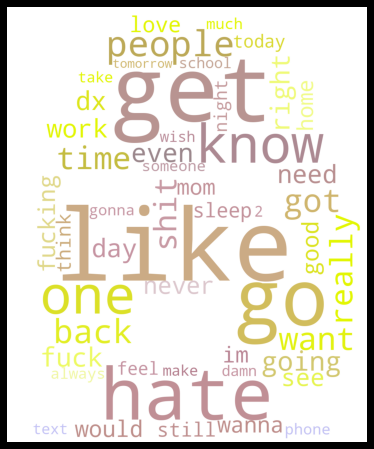

In [19]:
generate_wordcloud(convert_from_list_to_dict(anger_data))

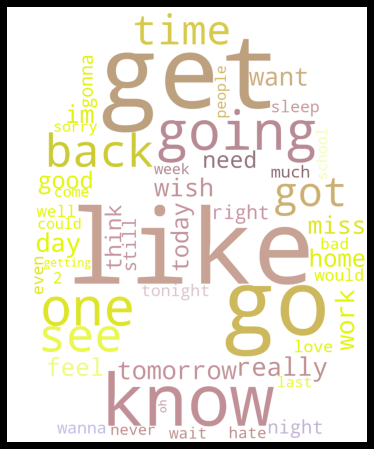

In [20]:
generate_wordcloud(convert_from_list_to_dict(anticipation_data))

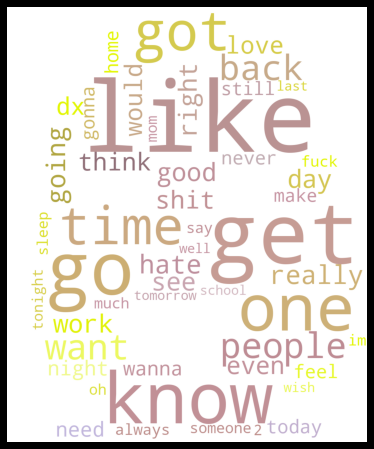

In [21]:
generate_wordcloud(convert_from_list_to_dict(disgust_data))

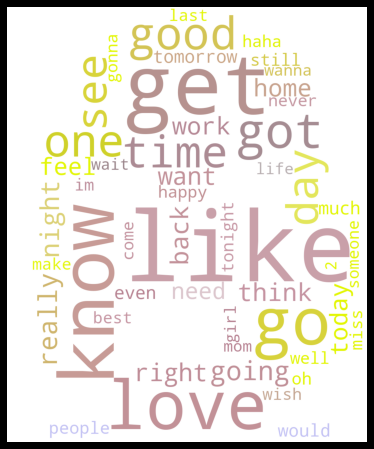

In [22]:
generate_wordcloud(convert_from_list_to_dict(fear_data))

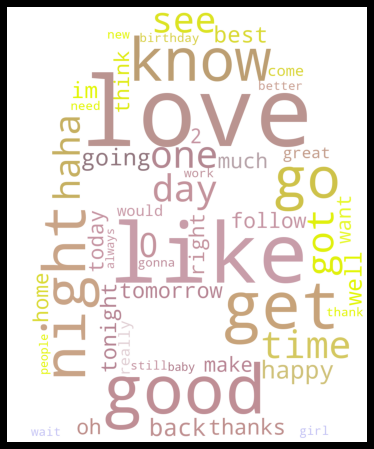

In [23]:
generate_wordcloud(convert_from_list_to_dict(joy_data))

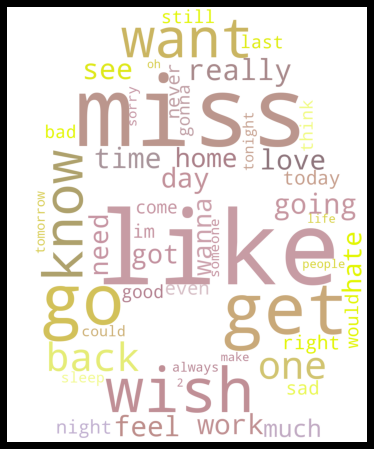

In [24]:
generate_wordcloud(convert_from_list_to_dict(sadness_data))

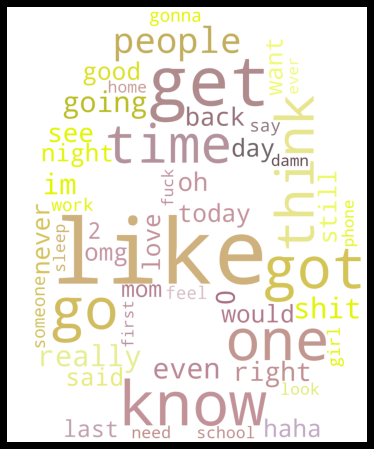

In [25]:
generate_wordcloud(convert_from_list_to_dict(surprise_data))

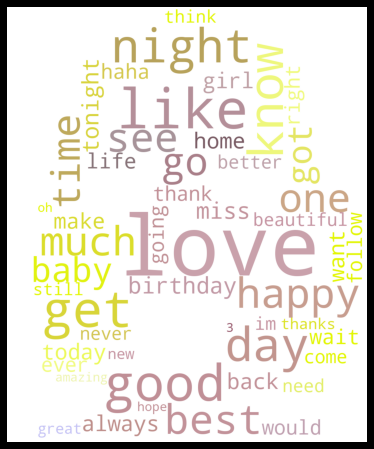

In [26]:
generate_wordcloud(convert_from_list_to_dict(trust_data))

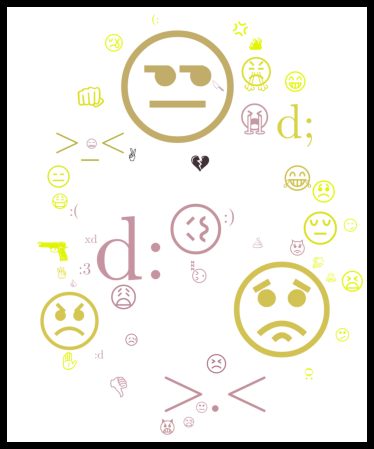

In [27]:
generate_emojicloud(convert_from_list_to_dict(anger_tokens))

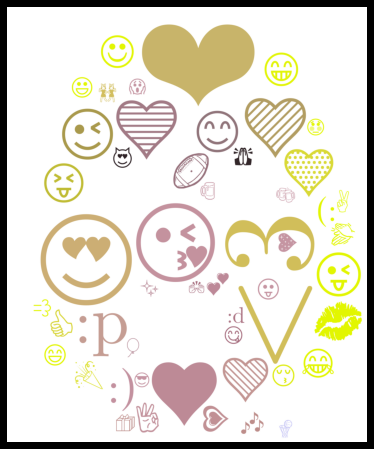

In [28]:
generate_emojicloud(convert_from_list_to_dict(trust_tokens))